<a href="https://colab.research.google.com/github/ND-CSE-30151/spring-2025/blob/main/notes/32-npc-reductions2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook 32: More NP-completeness reductions

## The clique problem

In an undirected graph, a _clique_ is a subset $C$ of nodes such that every pair of nodes in $C$ is connected by an edge. CLIQUE is the problem of deciding, given an undirected graph $G$ and $k > 0$, whether $G$ has a clique of size $k$. For example, in the graph below,

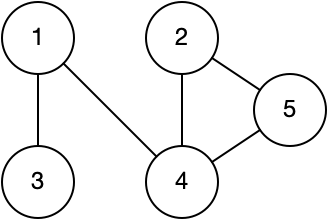

{2,4,5} is a clique, but {1,2,3} is not. The book uses CLIQUE as its first example of reduction from 3SAT; we'll do the reduction from IND-SET.

Proof that CLIQUE is in NP: If $G$ has $|V|$ nodes and is stored as an adjacency matrix, the size of the input is $n \in O(|V|^2 + \log k)$. We can check whether a subset $C$ is a clique by looping over all $u, v \in C$ and checking that each pair $(u, v)$ is an edge of $G$. This takes $O(|V|^2) \leq O(n)$ time.

To do the reduction from IND-SET, we need to give a mapping $f$ such that $G$ has a $k$-independent set iff $f(G)$ has a $k$-clique. Notice that IND-SET and CLIQUE are like opposites of each other: an independent set is one where _no_ nodes have an edge between them, and a clique is one where _all_ nodes have an edge between them. So the mapping we want is to change every edge into no edge, and every "absence of an edge" into an edge. In other words, $f$ forms the edge complement of $G$. If $G$ is our example graph above, then $f(G)$ is

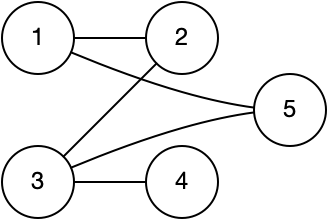

Note that $G$ has a clique $\{2,4,5\}$, while $f(G)$ has an independent set $\{2,4,5\}$.

To prove that $f$ is correct: If $C$ is a $k$-clique of $G$, then every pair of nodes has an edge between them. So if we consider $C$ as a subgraph of $f(G)$, every pair of nodes in $C$ does _not_ have an edge between them, that is, $C$ is an independent set. Similarly, if $C$ is an independent set of $f(G)$, then $C$ is a clique of $G$.

The last step is to state that $f$ obviously runs in polynomial time.

## Vertex cover

If $G$ is a graph, a *vertex cover* of $G$ is a subset $C$ of nodes such that every edge in $G$ touches a node in $C$. For example, in the graph

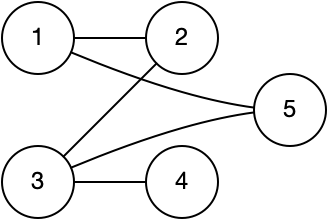

{2,4,5} is a vertex cover, but {1,2,3} is not (because it misses edge (3,4)).

The vertex cover problem is to decide, given $G$ and a number $k$, whether $G$ has a vertex cover of size $k$. More formally, VERTEX-COVER is the set of pairs $\langle G, k\rangle$ where $G$ is a graph and there is a subset $C$ of $k$ nodes such that every edge in $G$ touches a node in $C$.

**Exercise.** Prove that VERTEX-COVER is NP-complete (by reduction from IND-SET).

This reduction looks rather similar to the one for CLIQUE, but I think it is worthwhile to think carefully about how the two reductions differ.

## The subset-sum problem

<div class="alert alert-info">
    <p><b>Read</b> from the bottom of page 319 to the top of page 322.</p>
</div>

SUBSET-SUM is the set of pairs $\langle S, t\rangle$ where $S$ is a set of $n$ natural numbers and $t$ is a natural number, and there is a subset $C \subseteq S$ such that $\sum C = t$. For example, $\langle \{4,11,16,21,27\}, 25 \rangle$ belongs to SUBSET-SUM because $4+21=25$.

SUBSET-SUM is in NP because we can check whether a subset $C$ adds up to $t$ in $O(n)$ time.

We prove that SUBSET-SUM is NP-hard by reduction from 3SAT. We need to define a mapping from formulas $\phi$ to pairs $\langle S, t\rangle$.

> Interior monologue
>
> A certificate is a subset $C \subseteq S$; in other words, a certificate says for each $c \in C$ whether $c$ is "in" or "out".
>
> - We could create a number in $S$ for each literal, and $C$ contains the numbers corresponding to lucky literals.
>
> - We could create a number in $S$ for each variable and its negation, and $C$ contains the numbers corresponding to true variables and negations of false variables.
>
> Let's think about the first of these options. We can ensure that exactly one literal in each clause is lucky like so:
>
> 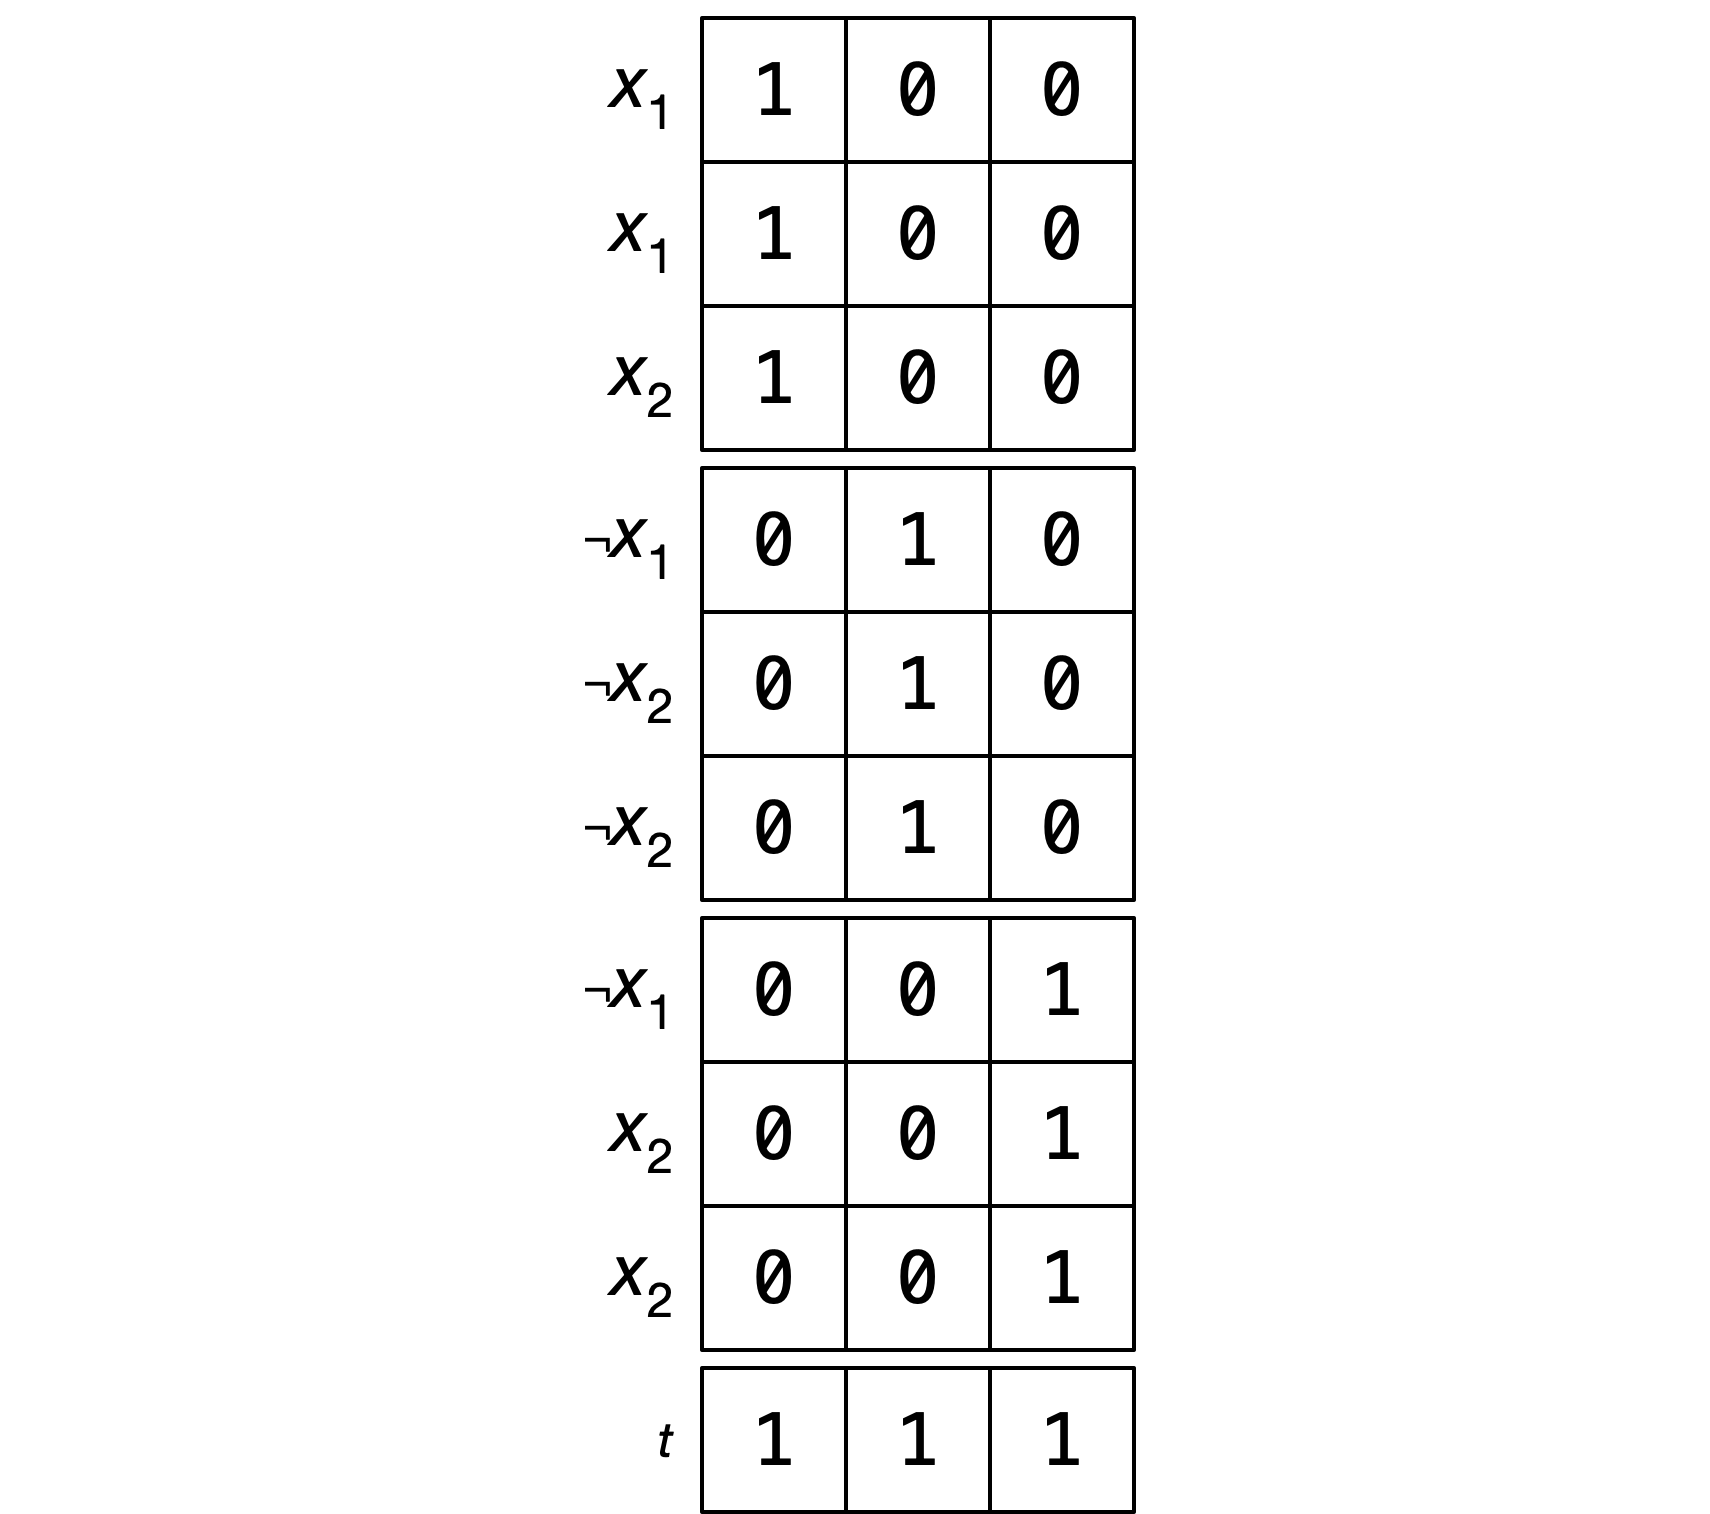
>
> But it's not clear how to ensure that no lucky literals are contradictory.

> So let's think more about the second option. We need to ensure that every variable is either true or false, and we need to ensure that each clause is true.
>
> To ensure that every variable is true or false, we can do this:
>
> 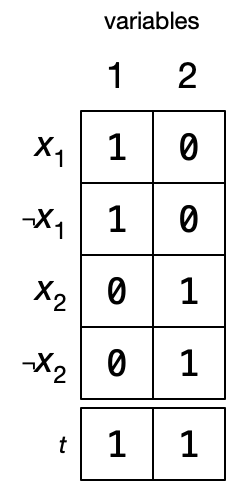

For each variable $x_i$, we will add two numbers, $p_i$ and $q_i$, to $S$, corresponding to $x_i$ and $\neg x_i$.

The first $l$ digits of each number are used to ensure that $p_i$ and $q_i$ are not both included in $C$. Let the $i$'th digit of $p_i$ and $q_i$ be 1; let the rest of the first $l$ digits be 0. Let the first $l$ digits of $t$ be 1's.

> To ensure that every clause is true, we can add a new digit for each clause, like this:
>
> 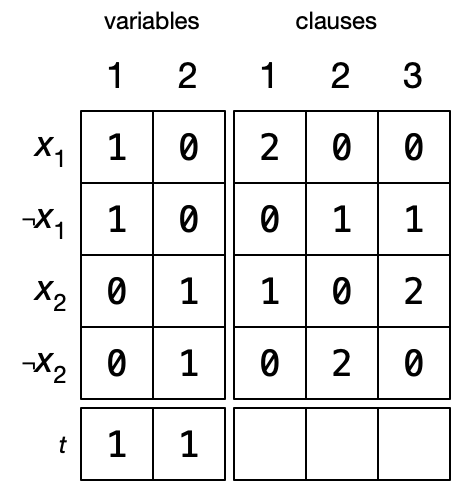

The next $m$ digits (that is, digits $l+1$ through $l+m$) are used to ensure that all clauses are true. Let the $(l+j)$th digit of $p_i$ be the number of times that $x_i$ occurs in the $j$th clause, and let the $(l+j)$th digit of $q_i$ be the number of times that $\neg x_i$ occurs in the $j$th clause.

> But, it's not clear what the values of these new digits in $t$ should be. In a satisfying assignment, *at least* one literal in every clause is true, but we only know how to use $t$ to enforce an *exact* number. We can fix this by adding some "slack" numbers to $S$:
>
> 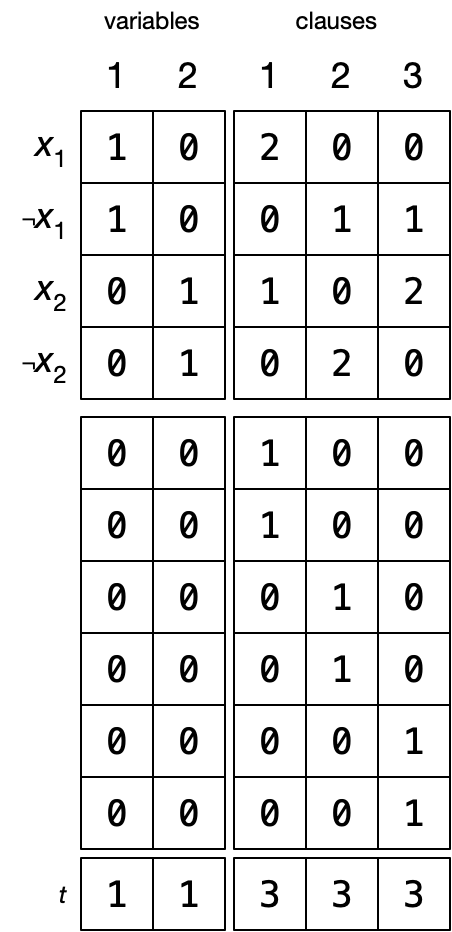
>
> Now, if a clause digit adds up to 1 or 2, we can use the "slack" numbers to bring the sum up to 3. But if a clause digit adds up to 0, there aren't enough "slack" numbers to bring the sum up to 3.

For each clause $j$, add two numbers that have a 1 in digit $l+j$ and 0's elsewhere.

Again, the proof that $\phi$ is satisfiable iff $S$ has a subset that sums to $t$ can be found in the book, and again it's obvious that $S$ and $t$ can be constructed in polynomial time.